In [1]:
import qiskit

In [2]:
from matplotlib import pyplot as plt 
import numpy as np
from qiskit_machine_learning.datasets import ad_hoc_data,sample_ad_hoc_data
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name


ModuleNotFoundError: No module named 'qiskit_machine_learning'

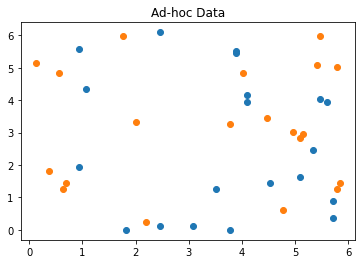

{'A': 0, 'B': 1}


In [6]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = 10598
quantum_instance = QuantumInstance(backend, shots=1000, seed_simulator=10598)
result = svm.run(quantum_instance)

In [8]:
result

{'kernel_matrix_training': array([[1.00028607, 0.32432611, 0.06499551, ..., 0.13447024, 0.09312634,
         0.15506358],
        [0.32432611, 1.00335195, 0.34408615, ..., 0.31141986, 0.00452858,
         0.07480872],
        [0.06499551, 0.34408615, 1.00712288, ..., 0.23597756, 0.24627395,
         0.20219175],
        ...,
        [0.13447024, 0.31141986, 0.23597756, ..., 1.00263193, 0.29976758,
         0.37917258],
        [0.09312634, 0.00452858, 0.24627395, ..., 0.29976758, 1.00441988,
         0.78655423],
        [0.15506358, 0.07480872, 0.20219175, ..., 0.37917258, 0.78655423,
         1.00597763]]),
 'svm': {'alphas': array([4.11228788, 2.72888091, 1.80789128, 1.57467272, 0.05604061,
         0.50099122, 0.92727276, 0.28464436, 2.18150572, 2.18624904,
         2.45658266, 1.55447021, 0.18880159, 2.8557838 ]),
  'bias': array([-0.1643026]),
  'support_vectors': array([[3.51858377, 1.25663706],
         [3.0787608 , 0.12566371],
         [4.08407045, 4.1469023 ],
         [5.71

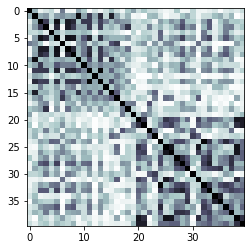

In [12]:
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest', origin='upper',cmap='bone_r')